In [334]:
from io import StringIO
import geopandas as gpd
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from pathlib import Path
from requests import get
from shapely.ops import cascaded_union
import yaml
import requests_cache

requests_cache.install_cache('demo_cache')

In [335]:
y1, x1 = 62.0, 35.0
y0, x0 = 34.0, -11.0
europe =   {"geometry": {
           "type": "Polygon",
           "coordinates": [
             [ 
               [x0, y0], 
               [x0, y1], 
               [x1, y1],
               [x1, y0], 
               [x0, y0] 
             ]
             ]
         },
         "properties": {
           "prop0": "value0",
           "prop1": {"this": "that"}
           }
         }
eu_area = gpd.read_file(StringIO(json.dumps(europe)))
eu_area = eu_area.set_crs("EPSG:4326")
europe

{'geometry': {'type': 'Polygon',
  'coordinates': [[[-11.0, 34.0],
    [-11.0, 62.0],
    [35.0, 62.0],
    [35.0, 34.0],
    [-11.0, 34.0]]]},
 'properties': {'prop0': 'value0', 'prop1': {'this': 'that'}}}

In [336]:
maps = lambda:yaml.safe_load(Path("mappe.yaml").read_text())['maps']

# https://gisco-services.ec.europa.eu/distribution/v2/countries/distribution/BA-region-10m-3857-2020.geojson
def area(label):
    coord_type = 3857
    coord_type = 4326
    base = "https://gisco-services.ec.europa.eu/distribution/v2"
    
    if isinstance(label, int):
        return get(f'http://polygons.openstreetmap.fr/get_geojson.py?id={label}&params=0')
    
    if label.startswith("http"):
        return get(label)
    
    
    for db, year in (("nuts",2021), ("countries", 2020)):
        ret = get(
            f"{base}/{db}/distribution/{label}-region-10m-{coord_type}-{year}.geojson"
        )
        if ret.status_code == 200:
            break
        print(f'cannot find {ret.url}')
    return ret


def area_frame(label):
    return gpd.read_file(area(label).content.decode())


def join_areas(areas):
    area_frames = [area_frame(label) for label in areas]
    ret = gpd.GeoSeries(cascaded_union([x.geometry[0] for x in area_frames]))
    #ret = ret.set_crs("EPSG:4326")
    return ret # .to_crs("EPSG:4326")
def render(areas, facecolor1="blue", facecolor2="blue", edgecolor="white"):
    for i,t in enumerate(areas):
      t = t.intersection(eu_area)
      t.plot(ax=ax, edgecolor="white", facecolor=facecolor1,  linewidth=2)
      t.plot(ax=ax, edgecolor="white", facecolor=facecolor2,  linewidth=0, alpha=0.5)  
      #t.plot(edgecolor=edgecolor, facecolor="none", ax=ax)


def get_state(state):
    territori = maps()[state]['territori']
    return [join_areas(v) for k,v in territori.items()]
    
    
def render_state(state):
    state_area = get_state(state)
    color_config =  maps()[state]['config']
    render(state_area, **color_config)
    return state_area
%matplotlib qt

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BA-region-10m-4326-2021.geojson


/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BY-region-10m-4326-2021.geojson


/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

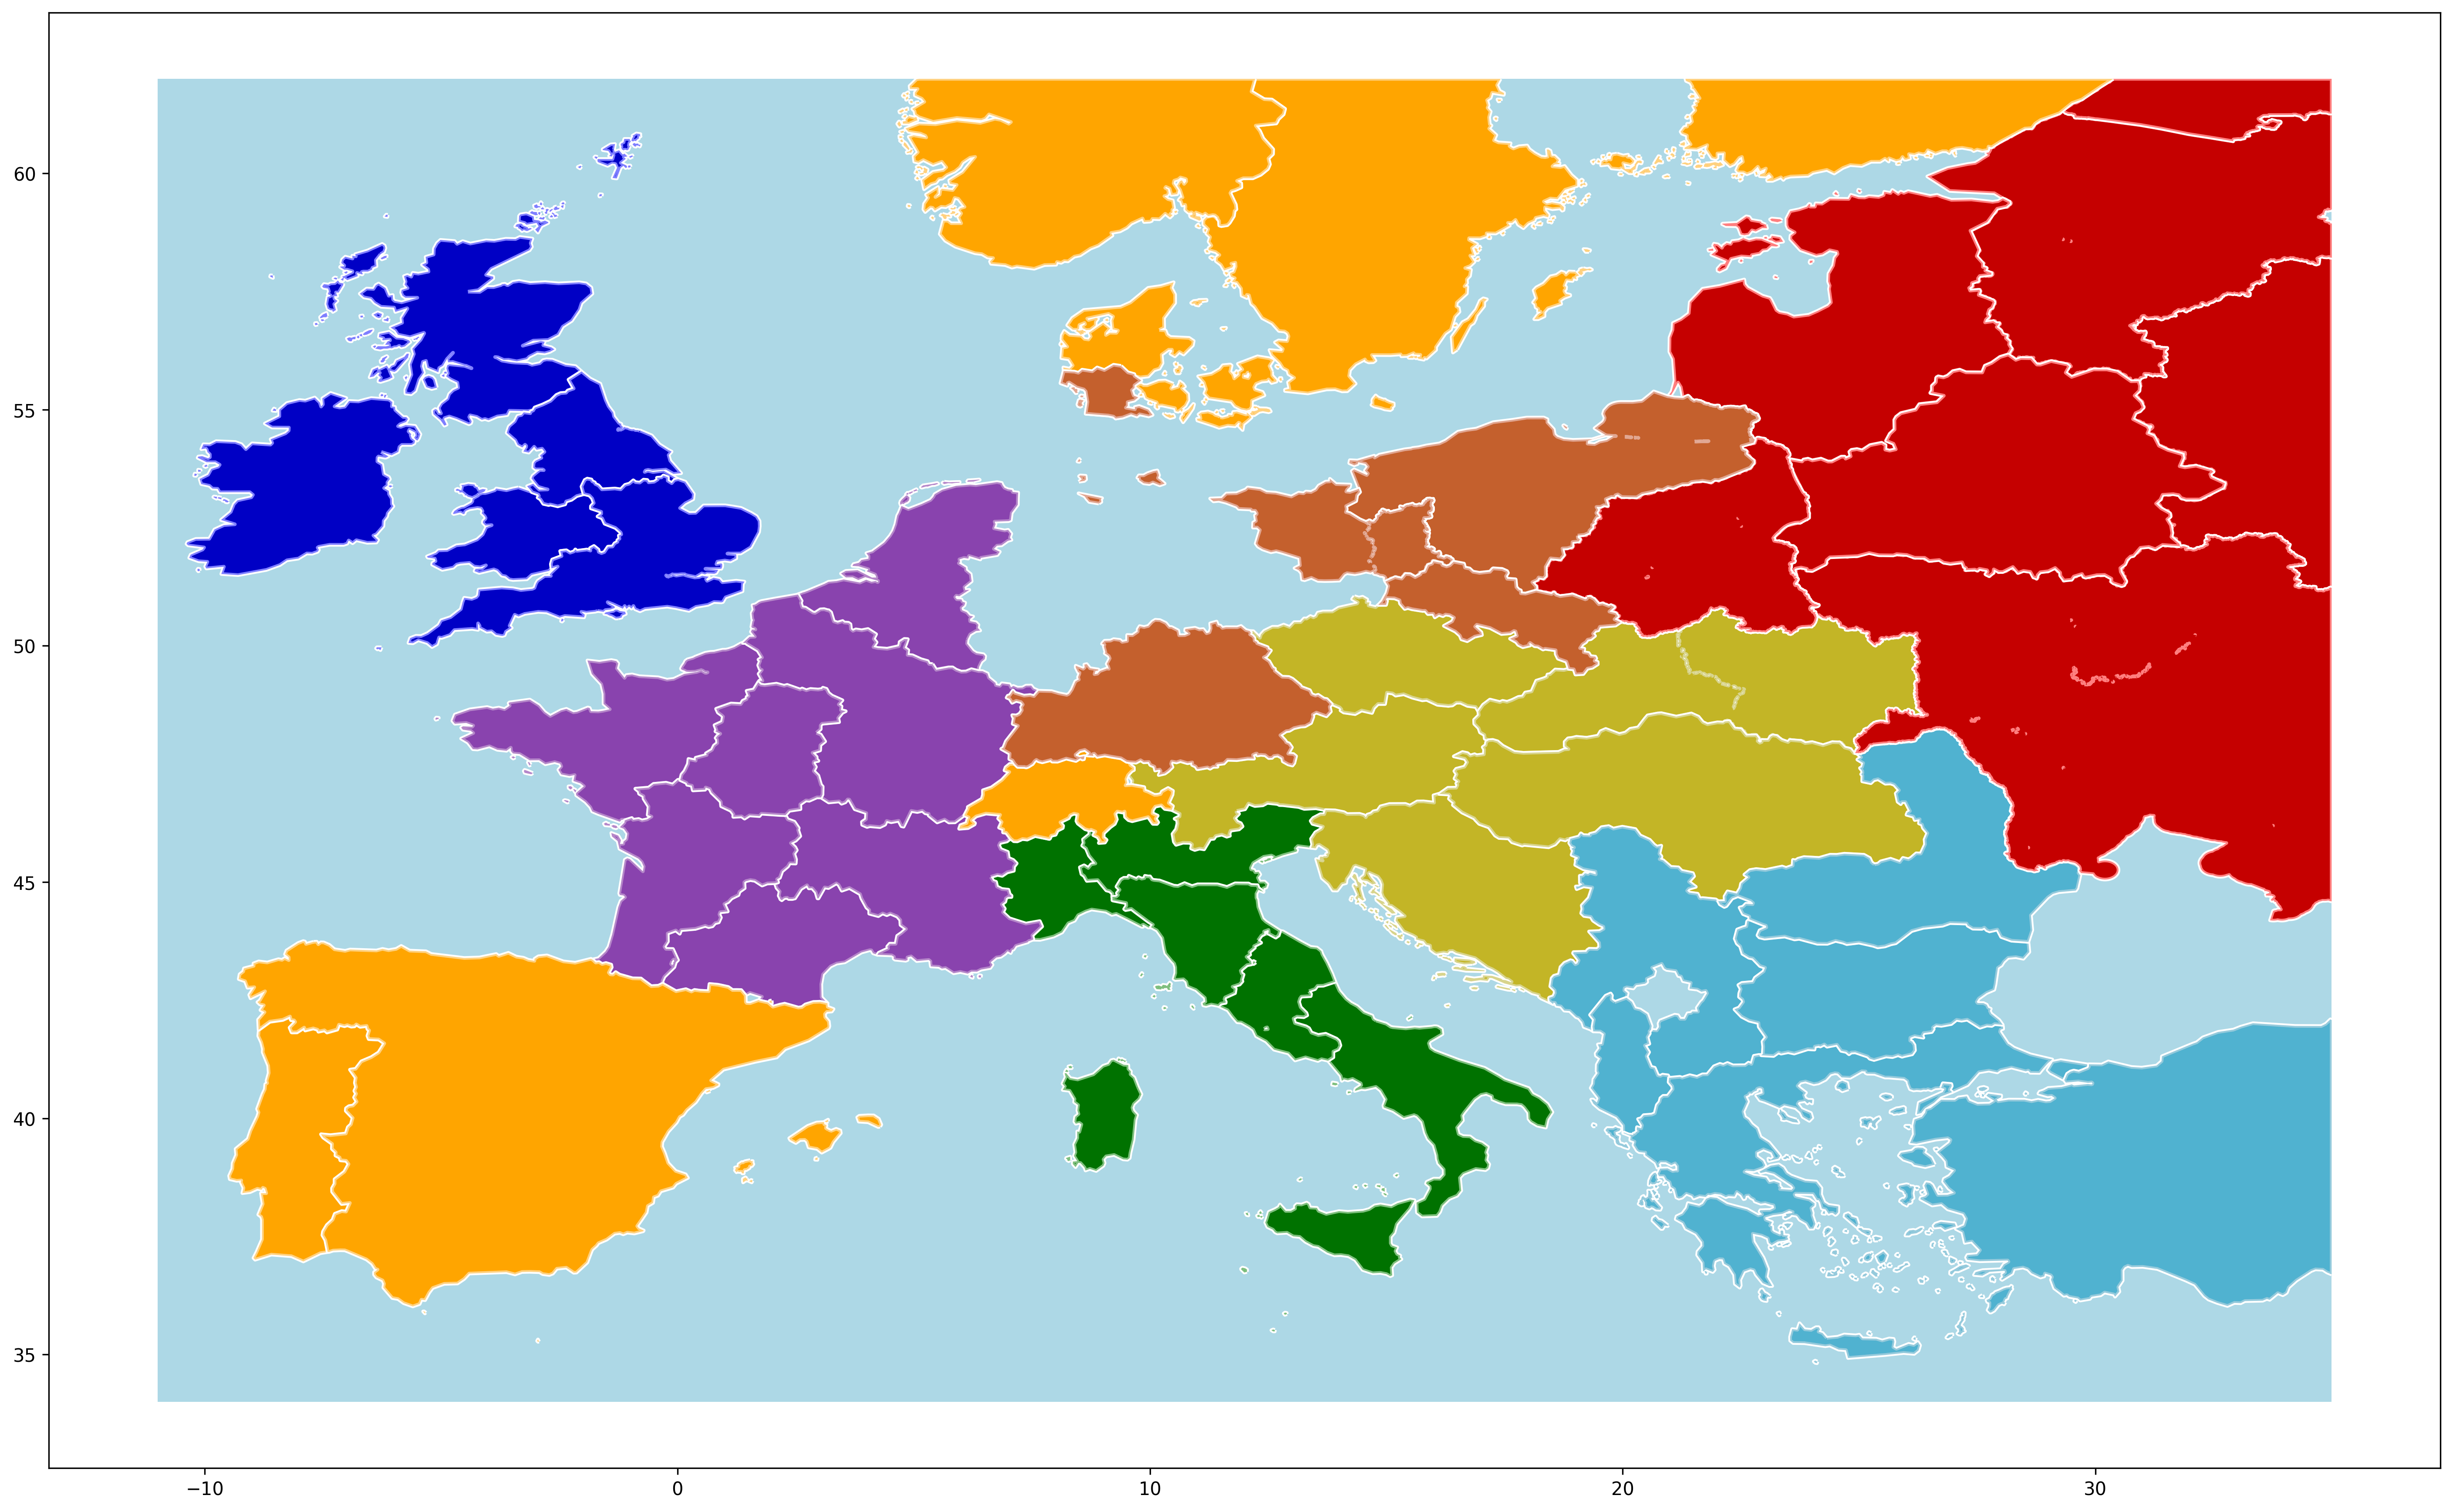

In [346]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,1)
fig.set_size_inches(23.62, 16,53)
fig.set_dpi(300)
eu_area.plot(ax=ax, facecolor="lightblue")

for l in ('Italia', 'France', 'Asburgici', 'Ottomano', 'Russia', 'Regno Unito', 'Indipendenti',"Prussia"):
    render_state(l)


In [347]:
fig.savefig('/tmp/risk.png', dpi=300)

In [240]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

### import contextily as ctx


In [352]:
r =get_state('Russia')

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BY-region-10m-4326-2021.geojson


In [ ]:
russia = get_state('Russia')

/home/rpolli/.local/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


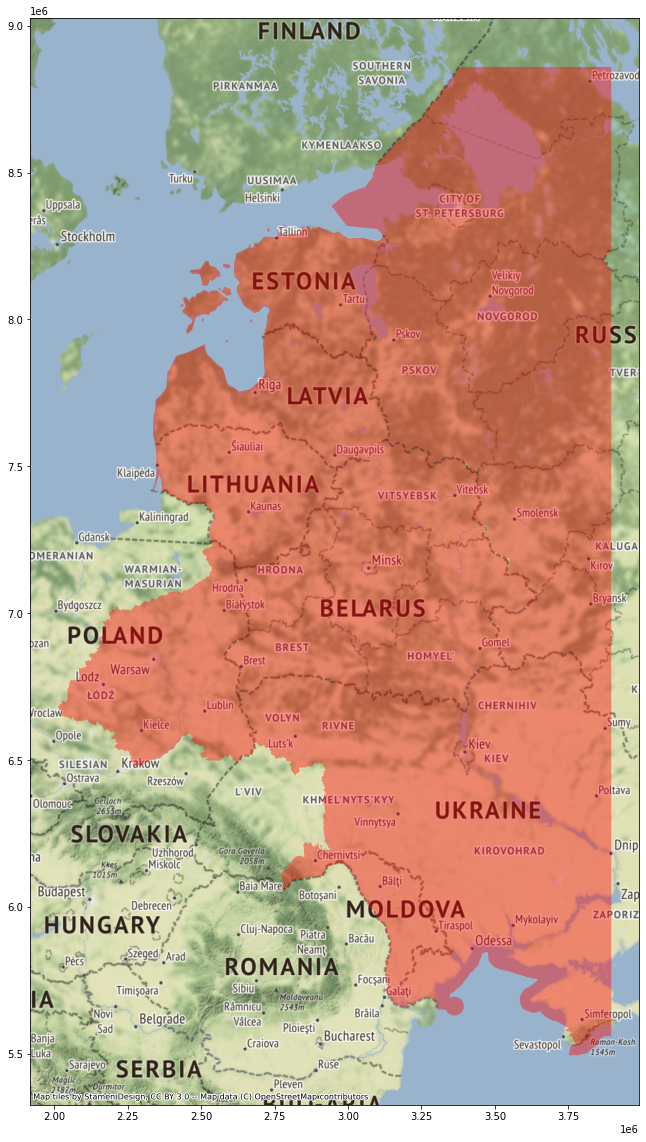

In [404]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,20)

R=gpd.GeoDataFrame(geometry=russia[0])
for s in russia[1:]:
    R = R.append(gpd.GeoDataFrame(geometry=s))
    
R = R.set_crs("EPSG:4326")
R=R.intersection(eu_area)
R=R.to_crs(epsg=3857)
R.plot(ax=ax1, alpha=0.4, linewidth=3, facecolor="red"
      )
import contextily as ctx
ctx.add_basemap(ax1)

In [370]:
russia[0].__class__


geopandas.geoseries.GeoSeries

<AxesSubplot:>

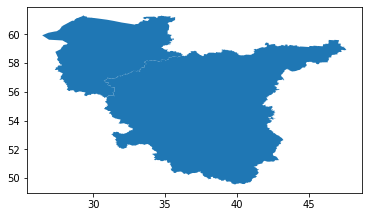

In [388]:
R1.plot()